# Geradores

## $ \pi^*$

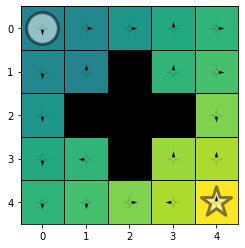

In [1]:
import numpy as np
from grid import Grid
from plot import plotPolicy, plotStateValue, plotActionStateValue, plotEffects, plotTrajectory

g = Grid()
g.pi_star(epsilon=.05)
# g.q_star()

ax = plotEffects(g)
plotPolicy(g.PI, g, ax=ax)
plotActionStateValue(g.Q, g, ax=ax)
# np.array([sum(q) for q in g.Q]).reshape(*g.size)
# g.PI
pi_star = g.PI

## $ h_1 $ 


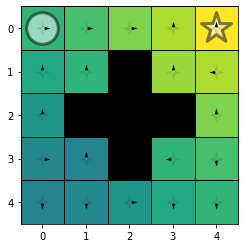

In [2]:
h1 = Grid()
target_1 = 4
h1.effects[(4,4)] = {'noise': lambda a: [-a[0], -a[1]]}
h1.effects[h1.S[target_1]] = {'terminal': True, 'reward': 10}

h1.pi_star(epsilon=.05)

ax = plotEffects(h1)
plotPolicy(h1.PI, h1, ax=ax)
plotActionStateValue(h1.Q, h1, ax=ax)

pi_1 = h1.PI

## $ h_2 $ 

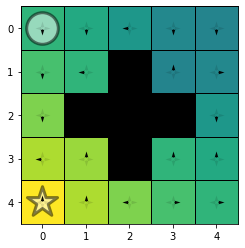

In [3]:
h2 = Grid()

target_2 = 20
h2.effects[(4,4)] = {'noise': lambda a: [-a[0], -a[1]]}
h2.effects[h2.S[target_2]] = {'terminal': True, 'reward': 10}

h2.pi_star(epsilon=.05)

ax = plotEffects(h2)
plotPolicy(h2.PI, h2, ax=ax)
plotActionStateValue(h2.Q, h2, ax=ax)

pi_2 = h2.PI

## $ \xi $

$ \eta(h|s) = \{^{.95 \;\; se \;\; s \in S^h}_{.05 \;\; se \;\; s \notin S^h} \;\; \forall h \in \mathcal{H} \; e \; \forall s \in S$ <br>
$ \pi_h(a|s) = \{^{.9625 \;\; se \;\; a = a^*}_{.0125 \;\; se \;\; a \ne a^*}  \;\; \forall a \in A \; e \; \forall s \in S$ <br>
$ \psi_h(s) = 0.3 \;\; \forall s \in S$

In [4]:
def generateTheta(S, eta=None, pis=None, psis=None):
    if eta is None:
        eta = {
            0: list(set(range(10, 25)) - {14}),
            1: list(range(10))+[14], 
        }
    if psis is None:
        psis = [[.3 for _ in g.S]]*2
    if pis is None: 
        pis = [pi_1, pi_2]
    
    H = list(zip(pis, psis))
    _eta = np.array([[.95 if s in eta[h] else .05 for h,_ in enumerate(H)] for s,_ in enumerate(S)])

    return H, _eta
    
generateTheta(g.S)

([(array([[0.0125, 0.0125, 0.9625, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.0125, 0.9625],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.0125, 0.9625],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.962

<AxesSubplot: >

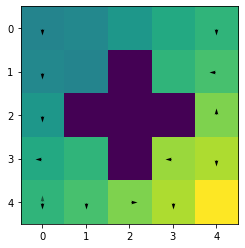

In [5]:
import random

def generateTrajetoryPi(pi, g, size=10):
    s = 0

    arr = []
    for _ in range(size-1):
        a  = random.choices(list(range(len(g.A))), pi[s], k=1)[0]
        step =  (s, a)
        s,_,_ = g.transition(s,  a)
        arr.append(step)
    arr.append((s, None))

    return arr

def generateTrajetory(H, eta, g, size=10):
    s = 0
    b = 1
    h = None
    arr = []
    for _ in range(size-1):
        if b == 1:
            h = random.choices(list(range(len(eta[s]))), eta[s], k=1)[0]
        
        pi, psi = H[h]
        
        a  = random.choices(list(range(len(pi[s]))), pi[s], k=1)[0]
        step =  (s, a)
        s,_,_ = g.transition(s,  a)
        arr.append(step)
        b = random.choices([0,1], [1-psi[s], psi[s]], k=1)[0]
    arr.append((s, None))

    return arr


tH = {1: list(range(10))+[14], 0: list(set(range(10, 25)) - {14}) }
psi_1 = [.3 for _ in g.S]
psi_2 = [.3 for _ in g.S]
H = [
    (pi_1, psi_1),
    (pi_2, psi_2)
]
eta = np.array([[.95 if s in tH[h] else .05 for h,_ in enumerate(H)] for s,_ in enumerate(g.S)])

E = generateTrajetory(H, eta, g, 15)
# E = generateTrajetoryPi(pi_star, g)

# ax = plotEffects(g)
# plotPolicy(h_2.PI, h_2, ax=ax)
ax = plotTrajectory(E, g)
plotActionStateValue(g.Q, g, ax=ax)

# Experimentação

In [6]:
from ddo import DDO 

ddo = DDO(E, H, eta)

print(ddo.posterior(0))
print(ddo.expectation_gradient())

0.008334914536336724
-13.6111428776171


In [7]:
H, eta = generateTheta(g.S, psis=[[.3 for _ in g.S]]*2)
E = generateTrajetory(H, eta, g, 10)
ddo = DDO(E, H, eta)
[ddo.posterior(t) for t,_ in enumerate(E)]

[0.0935713106209067,
 0.0935713106209067,
 0.0935713106209067,
 0.0935713106209067,
 0.0935713106209067,
 0.0935713106209067,
 0.0935713106209067,
 0.0935713106209067,
 0.0935713106209067,
 0.0935713106209067]

In [8]:
H, eta = generateTheta(g.S, psis=[[.9 for _ in g.S]]*2)
E = generateTrajetory(H, eta, g, 10)

for i in range(9):
    H, eta = generateTheta(g.S, psis=[[(i+1)*1/10 for _ in g.S]]*2)
    ddo = DDO(E, H, eta)
    print((i+1)*1/10, ddo.expectation_gradient())

0.1 11.739125119768563
0.2 9.437636738228974
0.3 7.00994426905789
0.4 5.041567323862644
0.5 3.5145422162699758
0.6 2.315433214125769
0.7 1.3548801975184035
0.8 0.571333371700574
0.9 -0.0778002583302202


In [9]:
[(i+1)*1/10 for i in range(9)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [10]:
def get_likelihood_from_theta(E, psi):
    H, eta = generateTheta(g.S, psis=psi)
    ddo = DDO(E, H, eta)
    return ddo.posterior(0)
    # return ddo.expectation_gradient()

In [11]:
p1_psi = [[.1 for _ in g.S]]*2
p2_psi = [[.9 for _ in g.S]]*2
p3_psi = [[.5 for _ in g.S]]*2
p_star_psi = [psi_1, psi_2]

psis = [p1_psi, p2_psi, p3_psi] + [p_star_psi]

likes = [get_likelihood_from_theta(E, psi) for psi in psis]
likes

p = np.argmax(likes)
print(f'Maior: {p}\n', likes)

Maior: 1
 [8.369838951359729e-07, 0.01502857787172312, 0.00044199353371666825, 3.264409765747397e-05]


In [12]:
def experiment(theta=.3, episodes=100, size_range=(10,50)):
    thetas = [(i+1)*1/10 for i in range(9)]
    psis = [[[theta for _ in g.S]]*2 for theta in thetas]

    params = []
    err = []
    for i in range(episodes):
        E = generateTrajetory(*generateTheta(g.S, psis=[[theta for _ in g.S]]*2), g, random.randrange(*size_range))
        likes = [get_likelihood_from_theta(E, psi) for psi in psis]
        estimative = thetas[np.argmax(likes)]
        params.append(estimative)
        err.append((estimative - theta)**2)

    estimate = round(np.mean(params),1)
    # err = [cum_err/(i+1) for i,_ in enumerate(params)]
    
    return estimate, params, err

theta = .3
estimate, params, err = experiment(theta)
estimate

0.3

Text(0.5, 0, 'episode')

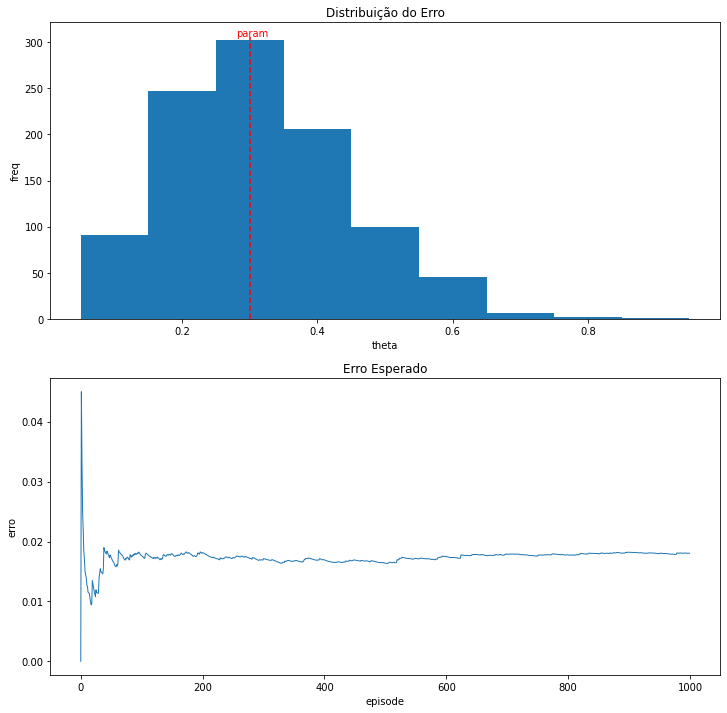

In [13]:
import matplotlib.pyplot as plt
from itertools import accumulate
from collections import Counter


theta = .3
estimate, params, err = experiment(theta, episodes=1000)

err_acum = [v/(i+1) for i,v in enumerate(list(accumulate(err)))]
freq = Counter(params)

fig, axs = plt.subplots(2,1, figsize=(12,12))

x = sorted(dict(freq))
y = [freq[i] for i in x]
m = max(freq.values())

axs[0].bar(x, y, width=.1)
axs[0].plot([theta for _ in range(m+5)], range(m+5), color='red', linestyle='dashed')
axs[0].text(theta-.02, m+4, 'param', color='red')
axs[0].set_title(f'Distribuição')
axs[0].set_ylabel('freq')
axs[0].set_xlabel('theta')

axs[0].set_title(f'Distribuição do Erro')
axs[1].set_title(f'Erro Esperado')
# axs[1].plot(range(len(err)), err, linewidth=1)#, marker='.')
axs[1].plot(range(len(err_acum)), err_acum, linewidth=1)#, marker='.')
axs[1].set_ylabel('erro')
axs[1].set_xlabel('episode')

# Gradient Descent

In [14]:
def get_eg_from_theta(E, psi):
    H, eta = generateTheta(g.S, psis=psi)
    ddo = DDO(E, H, eta)
    return ddo.expectation_gradient()

## Single Trajectory

In [15]:
def GradientDescentTest(param=None, learning_rate=.1, decay=.1, precision=1e-4, max_trials=1000):
    """
        Leaning Rate is changed with a Time-based learning schedule
    """
    if param is None:
        param = random.random()

    print(f'start at {param}')

    error = 1+precision
    trials = 0

    l = 6*param-5
    while (error > precision) and (trials < max_trials):
        trials += 1
        old_l = l
        
        param = param - learning_rate * l
        l =  6*param-5
        error = np.abs(l - old_l)
        learning_rate = learning_rate / (1+decay*trials)
            
        yield param, error, learning_rate

[(param, error, learning_rate) for param, error, learning_rate in GradientDescentTest()]

start at 0.5627726570857281


[(0.7251090628342912, 0.9740184344913785, 0.09090909090909091),
 (0.784140483106496, 0.3541885216332288, 0.07575757575757576),
 (0.8065008695732402, 0.13416231880046503, 0.05827505827505827),
 (0.8158828499089371, 0.05629188201418156, 0.041625041625041624),
 (0.8202411125024427, 0.0261495755610337, 0.02775002775002775),
 (0.8224209694506429, 0.013079141689201101, 0.01734376734376734),
 (0.8235565384527543, 0.0068134140126687726, 0.010202216084569022),
 (0.8241550082966714, 0.0035908190635023374, 0.005667897824760568),
 (0.8244671391477328, 0.0018727851063689016, 0.002983104118295036),
 (0.8246258318300649, 0.0009521560939917961, 0.001491552059147518),
 (0.8247037579808483, 0.0004675569047005723, 0.0007102628853083419),
 (0.8247405335833813, 0.00022065361519807425, 0.0003228467660492463),
 (0.8247571785290447, 9.986967398045721e-05, 0.00014036815915184622)]

## Expectation Gradient

$ \nabla_{\theta}L[\theta;\xi] = \sum_{h \in \mathcal{H}} \; \lgroup \; \sum_{t=0}^{T-1} \;\lgroup\; v_t(h) \nabla_{\theta} log \eta(h|s_t) + u_t(h) \nabla_{\theta} log \pi_h(a_t|s_t)
\;\rgroup\; + \sum_{t=0}^{T-2} \;\lgroup\; (u_t(h) - w_t(h)) \nabla_{\theta} log \psi_h(s_{t+1}) + w_t(h) \nabla_{\theta} log (1-\psi_h(s_{t+1})) \;\rgroup\;\;\rgroup\; $ 

Sendo:<br><br>
$ \nabla_{\theta} log \eta(h|s_t) = \frac{\partial log \eta(h|s_t)}{\partial \theta} = \frac{1}{\eta(h|s_t)} \frac{\partial \eta(h|s_t)}{\partial \theta} = \frac{1}{\eta(h|s_t)} * 0 = 0        $ <br><br>
$ \nabla_{\theta} log \pi_h(a_t|s_t) = \frac{\partial log \pi_h(a_t|s_t)}{\partial \theta} = \frac{1}{\pi_h(a_t|s_t)} \frac{\partial \pi_h(a_t|s_t)}{\partial \theta} = \frac{1}{\pi_h(a_t|s_t)}  * 0 = 0   $ <br><br>
$ \nabla_{\theta} log \psi_h(s_{t+1}) = \frac{\partial log \psi_h(s_{t+1})}{\partial \theta} = \frac{1}{\psi_h(s_{t+1})} \frac{\partial \psi_h(s_{t+1})}{\partial \theta} = \frac{1}{\psi_h(s_{t+1})} * 1 = \frac{1}{\psi_h(s_{t+1})}      $ <br><br>
$ \nabla_{\theta} log (1-\psi_h(s_{t+1})) = \frac{\partial log (1-\psi_h(s_{t+1}))}{\partial \theta} = \frac{1}{1-\psi_h(s_{t+1})} (-\frac{\partial \psi_h(s_{t+1})}{\partial \theta}) = \frac{1}{1-\psi_h(s_{t+1})} * 1 = \frac{1}{1-\psi_h(s_{t+1})}   $

# testes

In [133]:
import random 

def GradientDescent(E, S, param=None, learning_rate=.1, decay=.1, precision=1e-4, max_trials=1000):
    """
        Leaning Rate is changed with a Time-based learning schedule
    """
    if param is None:
        param = random.random()

    print(f'start at {param}')

    error = 1+precision
    trials = 0

    old_l = get_likelihood_from_theta(E, [[param for _ in S]]*2)
    while (error > precision) and (trials < max_trials):
        trials += 1

        new_param = param + learning_rate * get_eg_from_theta(E, [[param for _ in S]]*2)
        l = get_likelihood_from_theta(E, [[new_param for _ in S]]*2)
        error = np.abs(l - old_l)
        
        if new_param >= 1:
            learning_rate -= learning_rate / (trials+1)
            trials-=1
        elif new_param <= 0:
            learning_rate += learning_rate / (trials+1)
            trials-=1
        elif old_l > l:
            learning_rate -= learning_rate / (trials+1)
        else:
            learning_rate += learning_rate / (trials+1)
            param = new_param
            old_l = l
            
        yield param, error, learning_rate
        

E = generateTrajetory(*generateTheta(g.S, psis=[[.3 for _ in g.S]]*2), g, 20)
print('estimative: ')
[(param, error, learning_rate) for param, error, learning_rate in GradientDescent(E, g.S)]

estimative: 
start at 0.024580465633853188


[(0.024580465633853188, 572847.327026606, 0.05),
 (0.024580465633853188, 793.196278227058, 0.025),
 (0.024580465633853188, 0.03657520700697839, 0.0125),
 (0.8285143003027893, 1.091171314588553e-05, 0.018750000000000003)]

In [ ]:
ax = plotTrajectory(E, g)
plotActionStateValue(g.Q, g, ax=ax)

In [ ]:
# param = 0.024580465633853188
# learning_rate = .1
# trials = 1

l = get_likelihood_from_theta(E, [[param for _ in g.S]]*2)

eg = get_eg_from_theta(E, [[param for _ in g.S]]*2)
new_param = param - learning_rate * eg

new_l = get_likelihood_from_theta(E, [[new_param for _ in g.S]]*2)

# l - new_l


print(f'learning rate: {learning_rate} - eg: {eg}')
print(f'param: {param} - like: {l}')
print(f'new_param: {new_param} - like: {new_l}')
print('error: ', np.abs(new_l - l))
print('increment: ' if new_l >= l else 'decrement: ', learning_rate / (trials+1))


if new_param >= 1:
    learning_rate -= learning_rate / (trials+1)
elif new_param <= 0:
    learning_rate -= learning_rate / (trials+1)
else:
    if new_l >= l:
        learning_rate += learning_rate / (trials+1)
        param = new_param
        l = new_l
    else:
        learning_rate -= learning_rate / (trials+1)

    trials += 1 

# OLD

In [ ]:
import random 

def GradientDescent(E, S, param=None, learning_rate=.1, decay=.1, precision=1e-4, max_trials=1000):
    """
        Leaning Rate is changed with a Time-based learning schedule
    """
    if param is None:
        param = random.random()

    print(f'start at {param}')

    error = 1+precision
    trials = 0

    l = get_eg_from_theta(E, [[param for _ in S]]*2)
    while (error > precision) and (trials < max_trials):
        trials += 1
        old_l = l
        
        param = param - learning_rate * l
        l = get_eg_from_theta(E, [[param for _ in S]]*2)
        error = np.abs(l - old_l)
        learning_rate = learning_rate / (1+decay*trials)
            
        yield param, error, learning_rate
        

E = generateTrajetory(H, eta, g, 10)
print('estimative: ')
[(param, error, learning_rate) for param, error, learning_rate in GradientDescent(E, g.S)]

estimative: 
start at 0.012477709406955584


[(-7.146523204079955, 78.64106984514234, 0.09090909090909091),
 (-6.505517684964207, 0.07256340681963547, 0.07575757575757576),
 (-5.965849191245051, 0.07228763500801971, 0.05827505827505827),
 (-5.546507014549196, 0.06513687920938338, 0.041625041625041624),
 (-5.244265563029455, 0.052898617464865794, 0.02775002775002775),
 (-5.041303323913706, 0.038797656323085405, 0.01734376734376734),
 (-4.9137790269416115, 0.02588432952427233, 0.010202216084569022),
 (-4.838500657082075, 0.015868176577138016, 0.005667897824760568),
 (-4.796589401289939, 0.00903291900259795, 0.002983104118295036),
 (-4.77450389947199, 0.004818589172373322, 0.001491552059147518),
 (-4.763453961386414, 0.0024262690134548848, 0.0007102628853083419),
 (-4.7581903628187385, 0.001159384765704985, 0.0003228467660492463),
 (-4.755797443711627, 0.00052785505730224, 0.00014036815915184622),
 (-4.754756970005797, 0.0002296707974407397, 5.848673297993592e-05),
 (-4.7543234258623395, 9.572638774546505e-05, 2.339469319197437e-05)

## Multi Trajectory

In [ ]:
import random 

def GradientDescent(Es, S, param=None, learning_rate=.1, decay=.1, precision=1e-4, max_trials=1000):
    """
        Leaning Rate is changed with a Time-based learning schedule
    """
    if param is None:
        param = random.random()

    print(f'start at {param}')

    error = 1+precision
    trials = 0

    l = sum([get_eg_from_theta(E, [[param for _ in S]]*2) for E in Es])
    while (error > precision) and (trials < max_trials):
        trials += 1
        old_l = l
        
        param = param + learning_rate * old_l
        l = sum([get_eg_from_theta(E, [[param for _ in S]]*2) for E in Es])
        error = np.abs(l - old_l)
        learning_rate = learning_rate / (1+decay*trials)
            
        yield param, error, learning_rate
        
n = 10
size = 20
Es = [generateTrajetory(H, eta, g, size) for _ in range(n)] 
print('estimative: ')
[(param, error, learning_rate) for param, error, learning_rate in GradientDescent(Es, g.S)]

estimative: 
start at 0.1474178855315459


[(-4.027700144437846, 119.63659260952525, 0.09090909090909091),
 (-18.69931586345777, 21.16732178978802, 0.07575757575757576),
 (-29.322077311899523, 3.4042825078583974, 0.05827505827505827),
 (-37.295047510709125, 1.4906428778531051, 0.041625041625041624),
 (-42.92797815230585, 0.7745838531435254, 0.02775002775002775),
 (-46.661770523284204, 0.4270367556065082, 0.01734376734376734),
 (-48.9879843290092, 0.23836250986897767, 0.010202216084569022),
 (-50.35391356536823, 0.13131081018227064, 0.005667897824760568),
 (-51.11201888486785, 0.07032212222787848, 0.002983104118295036),
 (-51.510811906392064, 0.03629035093189259, 0.001491552059147518),
 (-51.71015428820651, 0.017962942995495723, 0.0007102628853083419),
 (-51.80506647351596, 0.008511577528366843, 0.0003228467660492463),
 (-51.84820562799406, 0.003859946646144863, 0.00014036815915184622),
 (-51.86696124030137, 0.0016764965854179081, 5.848673297993592e-05),
 (-51.87477598070994, 0.0006982290787789225, 2.339469319197437e-05),
 (-51.

In [ ]:
1/0

In [ ]:
def GradientDescent(Es, S, param=None, learning_rate=.1, decay=.09, precision=1e-5, max_trials=10000):
    """
        Leaning Rate is changed with a Time-based learning schedule
    """
    E = random.choice(Es)

    if param is None:
        param = random.random()

    print(f'start at {param}')

    error = 1+precision
    trials = 0

    l = get_eg_from_theta(E, [[param for _ in S]]*2)
    while (error > precision) and (trials < max_trials):
        trials += 1
        E = random.choice(Es)
        
        new_param = param + learning_rate * get_eg_from_theta(E, [[param for _ in S]]*2)
        new_l = get_eg_from_theta(E, [[new_param for _ in S]]*2)
        error = np.abs(new_l - l)

        if new_l >= l:
            # learning_rate += (learning_rate * 0.2) 
            learning_rate += learning_rate / (1+decay*trials)
            l = new_l
            param = new_param
        else:
            # learning_rate -= (learning_rate * 0.2)
            learning_rate -= learning_rate / (1+decay*trials)
        
        print(trials, '- param: ', param, " erro: ", error)
        yield param, error


n_trajectories = 10
range_size = (10, 15)

Es = [generateTrajetory(H, eta, g, random.randrange(*range_size)) for _ in range(n_trajectories)]
print('estimative', execute(GradientDescent(Es, g.S)))

start at 0.616872359434437
1 - param:  0.044550891622558875  erro:  36.91131181598372
2 - param:  0.044550891622558875  erro:  79.40291378574398
3 - param:  0.044550891622558875  erro:  30.25768122049739
4 - param:  0.044550891622558875  erro:  18.768986200881077
5 - param:  0.044550891622558875  erro:  6.812724868297778
6 - param:  0.044550891622558875  erro:  6.243345719480134
7 - param:  0.044550891622558875  erro:  0.6760360304740054
8 - param:  0.044550891622558875  erro:  2.039924756111507
9 - param:  0.044550891622558875  erro:  5.851633003057026
10 - param:  0.044550891622558875  erro:  1.9778164534490728
11 - param:  0.044550891622558875  erro:  27.28535567408008
12 - param:  0.044550891622558875  erro:  27.285528132998017
13 - param:  0.044550891622558875  erro:  5.634489110286342
14 - param:  0.044582359496433084  erro:  15.513204707142307
15 - param:  0.044582359496433084  erro:  17.672476647355925
16 - param:  0.044582359496433084  erro:  17.667356211570386
17 - param:  0.

In [ ]:
n_trajectories = 100
range_size = (10, 50)

Es = [generateTrajetory(H, eta, g, random.randrange(*range_size)) for _ in range(n_trajectories)]
print('estimative', execute(GradientDescent(Es, g.S, learning_rate=.08)))

start at 0.30877011549395883
estimative (1.1404167879836864, 10001, 93.728971963949)
